# Sales Data Analysis

We are going to use some sales data to do some exploratory analysis to answer the following questions:

1. What is the overall Sales trend?
2. What are the top 10 products by sales?
3. What are the top 10 cities by sales?
4. What is the most preferred shipping?
5. Which Category and Sub-category had the highest sales?
6. What are the total monthly sales for each Category?

Dataset:
https://www.kaggle.com/datasets/ishanshrivastava28/superstore-sales

### Import Libraries

In [1]:
# Data Manipulation
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

### Import Dataset

In [2]:
# Importing dataset
df = pd.read_csv('Downloads/train.csv')

## Data Audit

Let's briefly look at the data, checking the first/last 5 rows, shape, columns, and info.

In [3]:
# View first 5 rows
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [4]:
# View last 5 rows
df.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.798
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.368
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.188
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.376
9799,9800,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-AC-10000487,Technology,Accessories,SanDisk Cruzer 4 GB USB Flash Drive,10.384


In [5]:
# Shape of dataset
df.shape

(9800, 18)

In [6]:
# Columns in the dataset
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [7]:
# Summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [8]:
# Checking missing values
df.isna().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

There are 11 null values in the 'Postal Code' column. 

Let's see what they are, and determine if we can find information to fill in the Null Values or if we should delete the rows with those Null Values.

In [9]:
# Print rows with null values
nan_rows = df[df.isnull().any(axis=1)]
print(nan_rows)

      Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
2234    2235  CA-2018-104066  05/12/2018  10/12/2018  Standard Class   
5274    5275  CA-2016-162887  07/11/2016  09/11/2016    Second Class   
8798    8799  US-2017-150140  06/04/2017  10/04/2017  Standard Class   
9146    9147  US-2017-165505  23/01/2017  27/01/2017  Standard Class   
9147    9148  US-2017-165505  23/01/2017  27/01/2017  Standard Class   
9148    9149  US-2017-165505  23/01/2017  27/01/2017  Standard Class   
9386    9387  US-2018-127292  19/01/2018  23/01/2018  Standard Class   
9387    9388  US-2018-127292  19/01/2018  23/01/2018  Standard Class   
9388    9389  US-2018-127292  19/01/2018  23/01/2018  Standard Class   
9389    9390  US-2018-127292  19/01/2018  23/01/2018  Standard Class   
9741    9742  CA-2016-117086  08/11/2016  12/11/2016  Standard Class   

     Customer ID     Customer Name      Segment        Country        City  \
2234    QJ-19255      Quincy Jones    Corporate  United S

Burlinton is the only city with Null Values, so using the customer names from this list, we can search all the rows containing the customer's name then check if they have additional orders to Burlington, then use those postal codes to fill in the Null Values.

In [10]:
# Check if customers with the same name have ordered to the cities with NullValues
selected_rows = df.loc[df['Customer Name'].isin(['Raymond Messe'])]
print(selected_rows)

      Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
1758    1759  CA-2015-139017  11/05/2015  17/05/2015  Standard Class   
1798    1799  CA-2017-100965  07/07/2017  11/07/2017  Standard Class   
1835    1836  CA-2015-141278  21/06/2015  24/06/2015     First Class   
6150    6151  US-2017-106600  08/04/2017  11/04/2017     First Class   
6404    6405  CA-2016-156328  30/11/2016  05/12/2016  Standard Class   
9386    9387  US-2018-127292  19/01/2018  23/01/2018  Standard Class   
9387    9388  US-2018-127292  19/01/2018  23/01/2018  Standard Class   
9388    9389  US-2018-127292  19/01/2018  23/01/2018  Standard Class   
9389    9390  US-2018-127292  19/01/2018  23/01/2018  Standard Class   

     Customer ID  Customer Name   Segment        Country        City  \
1758    RM-19375  Raymond Messe  Consumer  United States     Houston   
1798    RM-19375  Raymond Messe  Consumer  United States    San Jose   
1835    RM-19375  Raymond Messe  Consumer  United States     Me

After confirming that there were no additional postal code information using Customer Name and City, we can opt to delete these rows with Null Values 

In [11]:
# Drop any rows with null values
df.dropna(inplace=True)

In [12]:
# Confirm there are no Null Values
df.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [13]:
# Generating descriptive statistics summary
df.describe().round()

,Row ID,Postal Code,Sales
count,9789.0,9789.0,9789.0
mean,4897.0,55273.0,230.0
std,2827.0,32041.0,625.0
min,1.0,1040.0,0.0
25%,2449.0,23223.0,17.0
50%,4896.0,58103.0,54.0
75%,7344.0,90008.0,210.0
max,9800.0,99301.0,22638.0


Let's check if there's anything else we should change about the data set

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9789 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9789 non-null   int64  
 1   Order ID       9789 non-null   object 
 2   Order Date     9789 non-null   object 
 3   Ship Date      9789 non-null   object 
 4   Ship Mode      9789 non-null   object 
 5   Customer ID    9789 non-null   object 
 6   Customer Name  9789 non-null   object 
 7   Segment        9789 non-null   object 
 8   Country        9789 non-null   object 
 9   City           9789 non-null   object 
 10  State          9789 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9789 non-null   object 
 13  Product ID     9789 non-null   object 
 14  Category       9789 non-null   object 
 15  Sub-Category   9789 non-null   object 
 16  Product Name   9789 non-null   object 
 17  Sales          9789 non-null   float64
dtypes: float64(2)

The 'Order Date' and 'Ship Date' columns are object types. Let's change them to datetime types so that we can extract the day, month, or year for analysis.

In [15]:
# Change Order Date and Ship Date from string to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')

In [16]:
# Confirm Order Date and Ship Date have been changed to datetime
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9789 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9789 non-null   int64         
 1   Order ID       9789 non-null   object        
 2   Order Date     9789 non-null   datetime64[ns]
 3   Ship Date      9789 non-null   datetime64[ns]
 4   Ship Mode      9789 non-null   object        
 5   Customer ID    9789 non-null   object        
 6   Customer Name  9789 non-null   object        
 7   Segment        9789 non-null   object        
 8   Country        9789 non-null   object        
 9   City           9789 non-null   object        
 10  State          9789 non-null   object        
 11  Postal Code    9789 non-null   float64       
 12  Region         9789 non-null   object        
 13  Product ID     9789 non-null   object        
 14  Category       9789 non-null   object        
 15  Sub-Category   9789 non-nu

Finally, let's check to make sure there are no errors or typos regarding the unique values in each categorical column.

In [17]:
# Check unique values of each column that are general categories
unique_values_ship_mode = df['Ship Mode'].unique()
print(unique_values_ship_mode)
unique_values_segment = df['Segment'].unique()
print(unique_values_segment)
unique_values_country = df['Country'].unique()
print(unique_values_country)
unique_values_category = df['Category'].unique()
print(unique_values_category)
unique_values_sub_category = df['Sub-Category'].unique()
print(unique_values_sub_category)

['Second Class' 'Standard Class' 'First Class' 'Same Day']
['Consumer' 'Corporate' 'Home Office']
['United States']
['Furniture' 'Office Supplies' 'Technology']
['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']


# Exploratory Data Analysis

### 1. What is the overall Sales trend?

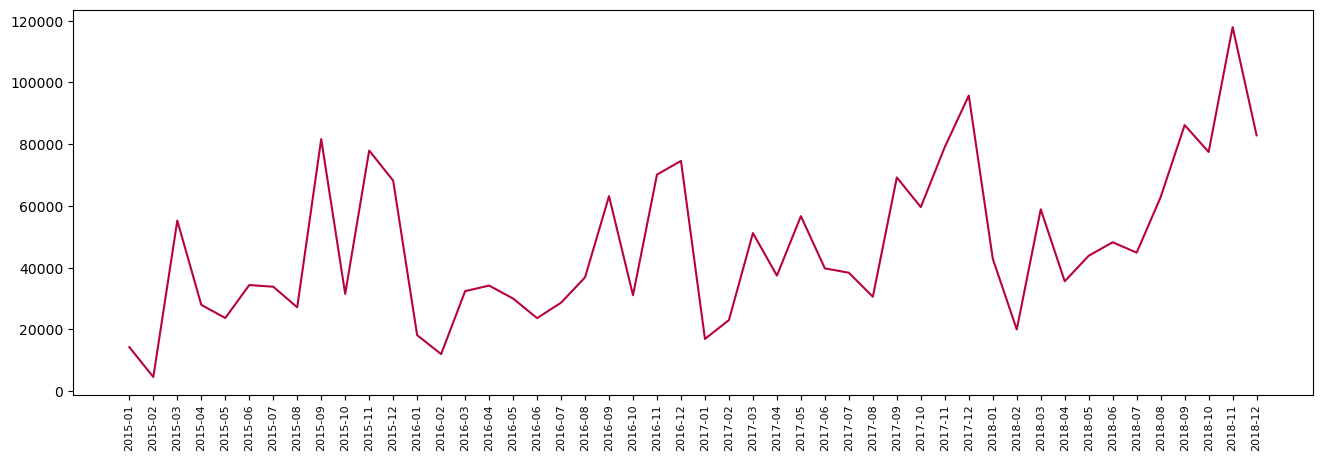

In [18]:
# Getting month year from order_date
df['month_year'] = df['Order Date'].apply(lambda x: x.strftime('%Y-%m'))

# grouping month_year by sales
df_temp = df.groupby('month_year')['Sales'].sum().reset_index()

# Setting the figure size
plt.figure(figsize=(16, 5))
plt.plot(df_temp['month_year'], df_temp['Sales'], color='#b80045')
plt.xticks(rotation='vertical', size=8)
plt.show()

The line chart shows an overall increasing trend, and there are spikes of inreased sales in the winter months.

### 2. What are the top 10 products by sales?

In [19]:
product_sales = df.groupby('Product ID')['Sales'].sum()

# Sort the results in descending order
sorted_product_sales = product_sales.sort_values(ascending=False)

# Display the top cities (e.g., top 10)
top_product = pd.DataFrame(sorted_product_sales.head(10))
print(top_product)

                     Sales
Product ID                
TEC-CO-10004722  61599.824
OFF-BI-10003527  27453.384
TEC-MA-10002412  22638.480
FUR-CH-10002024  21870.576
OFF-BI-10001359  19823.479
OFF-BI-10000545  19024.500
TEC-CO-10001449  18839.686
TEC-MA-10001127  18374.895
OFF-BI-10004995  17965.068
OFF-SU-10000151  17030.312


### 3. What are the top 10 cities by sales?

In [20]:
city_sales = df.groupby('City')['Sales'].sum()

# Sort the results in descending order
sorted_city_sales = city_sales.sort_values(ascending=False)

# Display the top cities (e.g., top 10)
top_city = pd.DataFrame(sorted_city_sales.head(10))
print(top_city)

                     Sales
City                      
New York City  252462.5470
Los Angeles    173420.1810
Seattle        116106.3220
San Francisco  109041.1200
Philadelphia   108841.7490
Houston         63956.1428
Chicago         47820.1330
San Diego       47521.0290
Jacksonville    44713.1830
Detroit         42446.9440


### 4. What is the most preferred shipping?

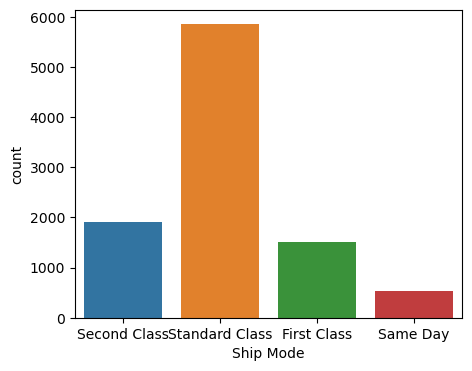

In [21]:
# Setting the figure size
plt.figure(figsize=(5, 4))

# countplot: Show the counts of observations in each categorical bin using bars
sns.countplot(x='Ship Mode', data=df)

# Display the figure
plt.show()

More than half of all orders used 'Standard Class' as the shipping method.

### 5. Which Category and Sub-category had the highest sales?

In [22]:
# Grouping products by Category and Sub-Category
cat_subcat = pd.DataFrame(df.groupby(['Category', 'Sub-Category'])['Sales'].sum())

# Sorting the values
cat_subcat.sort_values(['Category','Sales'], ascending=False)

Sales
Category        Sub-Category             
Technology      Phones        326487.6980
                Machines      189238.6310
                Accessories   163881.6900
                Copiers       146248.0940
Office Supplies Storage       217779.1020
                Binders       200028.7850
                Appliances    104075.4630
                Paper          76736.1040
                Supplies       46420.3080
                Art            26697.3700
                Envelopes      16126.0060
                Labels         12347.7260
                Fasteners       3001.9600
Furniture       Chairs        322107.5310
                Tables        202810.6280
                Bookcases     109408.2987
                Furnishings    89212.0180

Phones and Chairs brought in the most revenue.

### 6. What are the total monthly sales for each Category?

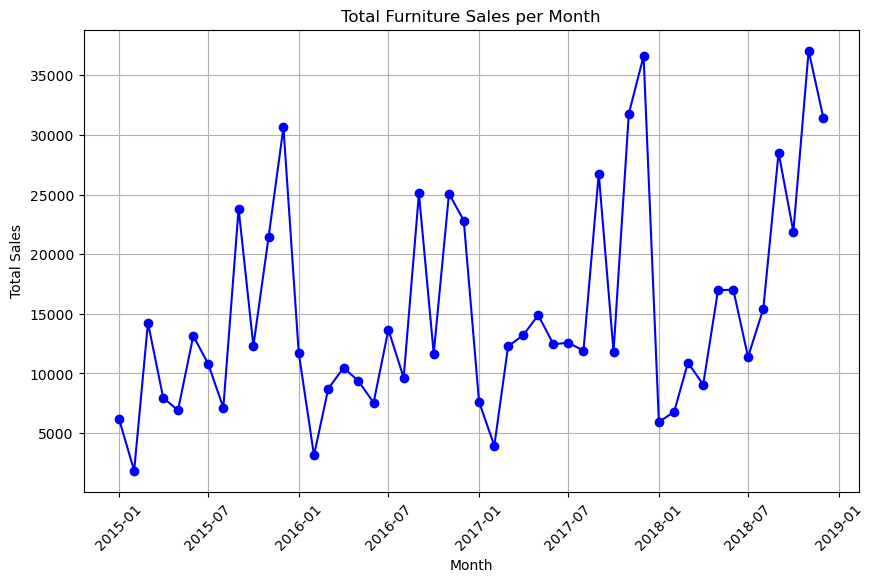

In [29]:
# Convert 'Order Date' column to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Filter data for 'Furniture' category
furniture_df = df[df['Category'] == 'Furniture']

# Group data by month and calculate total sales
monthly_sales = furniture_df.groupby(furniture_df['Order Date'].dt.to_period('M'))['Sales'].sum()

# Create the line chart
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index.to_timestamp(), monthly_sales.values, marker='o', linestyle='-', color='b')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Total Furniture Sales per Month')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

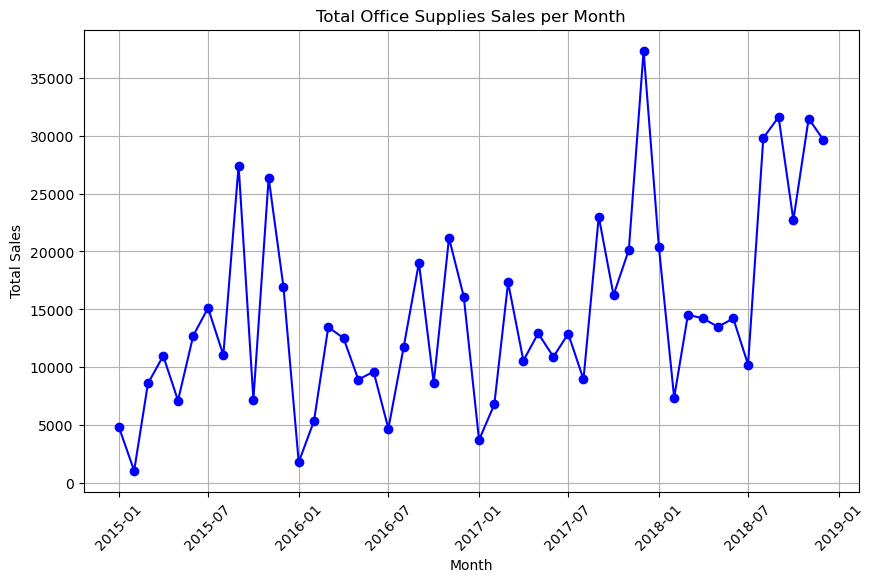

In [30]:
# Convert 'Order Date' column to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Filter data for 'Furniture' category
furniture_df = df[df['Category'] == 'Office Supplies']

# Group data by month and calculate total sales
monthly_sales = furniture_df.groupby(furniture_df['Order Date'].dt.to_period('M'))['Sales'].sum()

# Create the line chart
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index.to_timestamp(), monthly_sales.values, marker='o', linestyle='-', color='b')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Total Office Supplies Sales per Month')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

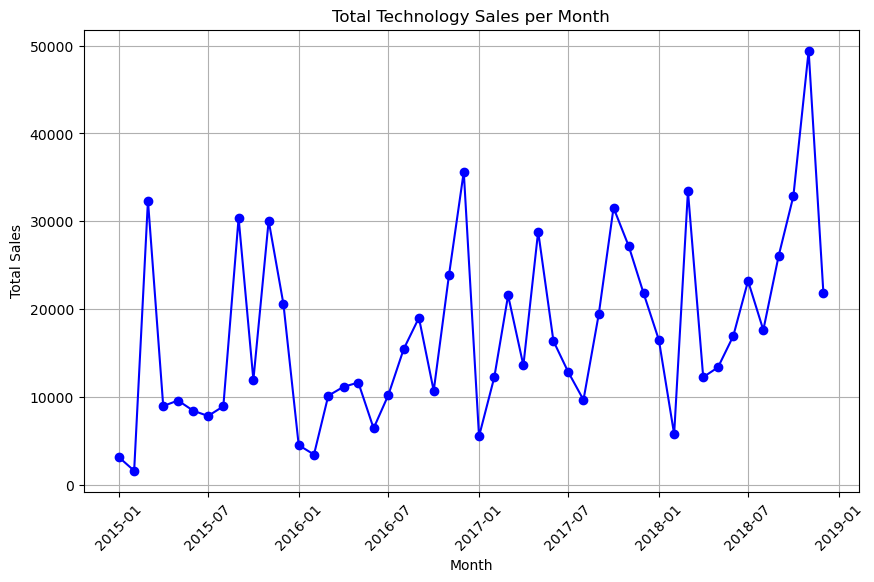

In [31]:
# Convert 'Order Date' column to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Filter data for 'Furniture' category
furniture_df = df[df['Category'] == 'Technology']

# Group data by month and calculate total sales
monthly_sales = furniture_df.groupby(furniture_df['Order Date'].dt.to_period('M'))['Sales'].sum()

# Create the line chart
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index.to_timestamp(), monthly_sales.values, marker='o', linestyle='-', color='b')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Total Technology Sales per Month')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()